In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [3]:
data_dir = '/s/project/mll/sergey/effect_prediction/outrider/input_data/outrider/'

In [4]:
outrider_df = pd.read_csv(data_dir + 'outrider_all.csv.gz')
#outrider_df = pd.read_csv('../../OUTRIDER/OUTRIDER_results_AML_panel_Enformer_5k.tsv', sep='\t')

In [5]:
outrider_df

,geneName,sampleID,pValue,padjust,l2fc
0,ENSG00000213741,MLL_17166,4.205244e-189,5.773975e-184,-10.48
1,ENSG00000213741,MLL_20382,3.843558e-169,5.277364e-164,-10.11
2,ENSG00000215301,MLL_01076,4.464477e-147,6.129912e-142,-4.29
3,ENSG00000165525,MLL_17166,5.145036e-119,3.532174e-114,-8.74
4,ENSG00000167004,MLL_33031,1.703930e-117,2.339567e-112,-3.13
...,...,...,...,...,...
51724598,ENSG00000288534,MLL_30494,3.716947e-01,1.000000e+00,0.15
51724599,ENSG00000288550,MLL_30494,6.163935e-02,1.000000e+00,0.38
51724600,ENSG00000288558,MLL_30494,5.386479e-01,1.000000e+00,0.07
51724601,ENSG00000288564,MLL_30494,2.635447e-01,1.000000e+00,0.15


In [350]:
sv_df = pd.read_csv('vale.svs.filtered.txt', sep='\t')

/var/folders/g8/63m7r3ks4j70zfydbky4bv1jx0rfhz/T/ipykernel_29452/2054663623.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  sv_df = pd.read_csv('vale.svs.filtered.txt', sep='\t')


In [351]:
sv_df = sv_df[~(sv_df.gnomad>5e-4)]
sv_df = sv_df[~sv_df.to_gene.isna()|~sv_df.from_gene.isna()]

In [352]:
gene_df = pd.read_csv('ensemble_to_HGNC_GRCh38.tsv.gz', sep='\t', 
                      header=None, names=['geneName', 'geneHGNC'], usecols=[0,1], skiprows=1)

In [353]:
if 'geneID' in outrider_df.columns:
    outrider_df['geneName'] = outrider_df.geneID.apply(lambda x:x.split('.')[0])

In [354]:
outrider_df = outrider_df.merge(gene_df)

In [355]:
def make_gene_list(x):
    gene_list = str(x.to_gene) + ',' + str(x.from_gene)
    gene_list = re.sub('\([-\+]\)','', gene_list)   
    gene_list = re.sub(',*nan,*','', gene_list)   
    return gene_list

sv_df['genes'] = sv_df.apply(make_gene_list, axis=1)

In [356]:
sv_df

,array_id,type,from_chrom,from_pos,from_direction,to_chrom,to_pos,to_direction,id,mateid,...,alt_pr,ref_sr,alt_sr,gnomad,from_band,to_band,from_gene,to_gene,potential_fusions,genes
1,MLL_11389,MantaDEL,1,12131655,forward,1,12134062,forward,MantaDEL:9057:0:2:0:0:0,NaN,...,20,96,35,0.000277,p36.22,p36.22,TNFRSF8(+),TNFRSF8(+),NaN,"TNFRSF8,TNFRSF8"
5,MLL_11389,MantaINV,1,78977194,reverse,1,78979489,forward,MantaINV:96958:0:1:8:0:0,NaN,...,9,138,12,0.000000,p31.1,p31.1,PTGFR(+),PTGFR(+),NaN,"PTGFR,PTGFR"
10,MLL_11389,MantaBND,1,95422997,reverse,3,169201825,reverse,MantaBND:14543:1:4:1:0:0:1,MantaBND:14543:1:4:1:0:0:0,...,4,0,0,0.000000,p21.3,q26.2,NaN,MECOM(-),NaN,MECOM
11,MLL_11389,MantaBND,1,95423135,forward,3,169201341,forward,MantaBND:14543:1:4:0:0:0:1,MantaBND:14543:1:4:0:0:0:0,...,4,0,0,0.000000,p21.3,q26.2,NaN,MECOM(-),NaN,MECOM
13,MLL_11389,MantaINS,1,112182028,forward,1,112182028,forward,MantaINS:25:6680:6680:1:10:0,NaN,...,13,24,51,0.000000,p13.2,p13.2,RAP1A(+),RAP1A(+),NaN,"RAP1A,RAP1A"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3186124,MLL_11293,MantaDEL,22,45135255,forward,22,45137530,forward,MantaDEL:101962:15:18:0:0:0,NaN,...,5,125,46,0.000000,q13.31,q13.31,"ARHGAP8(+),PRR5-ARHGAP8(+)","ARHGAP8(+),PRR5-ARHGAP8(+)","ARHGAP8::PRR5-ARHGAP8,PRR5-ARHGAP8::ARHGAP8","ARHGAP8,PRR5-ARHGAP8,ARHGAP8,PRR5-ARHGAP8"
3186130,MLL_11293,MantaINV,X,8139372,forward,X,8432898,reverse,MantaINV:778766:0:1:0:0:0,NaN,...,7,0,0,0.000000,p22.31,p22.31,NaN,VCX3B(+),NaN,VCX3B
3186135,MLL_11293,MantaBND,X,29353336,forward,19,20095927,reverse,MantaBND:9527:54:65:0:0:0:1,MantaBND:9527:54:65:0:0:0:0,...,13,63,36,0.000000,p21.2,p12,IL1RAPL1(+),NaN,NaN,IL1RAPL1
3186138,MLL_11293,MantaDEL,X,37850923,forward,X,37854430,forward,MantaDEL:781874:0:1:0:0:0,NaN,...,6,0,0,0.000000,p11.4,p11.4,TM4SF2(+),TM4SF2(+),NaN,"TM4SF2,TM4SF2"


In [357]:
genes_flatten = []

for _, row in sv_df[['array_id','svtype','genes']].iterrows():
    for gene in  row.genes.split(','):
        genes_flatten.append((row.array_id, row.svtype, gene))

In [358]:
genes_flatten = pd.DataFrame(genes_flatten, columns=['sampleID','svtype','geneHGNC']).drop_duplicates()

In [359]:
merged_df = outrider_df.merge(genes_flatten, how='left')

In [192]:
merged_df[merged_df['Unnamed: 0'].isin([42,59,78,25,84,11])]

,Unnamed: 0,sampleID,hgncSymbol,geneID,pValue,padjust,zScore,l2fc,rawcounts,normcounts,...,padj_rank,foldChange,Diag,VCF_file,RNA_file,enformer_log2fc,N_variants,geneName,geneHGNC,svtype
19,42,MLL_17744,NPM1,ENSG00000181163.13_3,2.369311e-06,2.502433e-02,-4.70,-0.38,51373,12999.09,...,12.0,0.77,AML,comb-MaleCon_comb-MLL_17744_G1_P1.somatic.vcf.gz,MLL_17744-M009.alignments.bam,0.046516,1.0,ENSG00000181163,NPM1,NaN
21,59,MLL_28859,NPM1,ENSG00000181163.13_3,4.267258e-13,2.929561e-08,6.54,0.52,79686,24202.71,...,2.0,1.43,AML,NovaSeq_Male_MLL_28859-M084_G1_P1.somatic.vcf.gz,MLL_28859-M007.alignments.bam,0.016070,1.0,ENSG00000181163,NPM1,NaN
33,11,MLL_13811,CREBBP,ENSG00000005339.15_8,4.549133e-16,6.246148e-11,7.28,0.57,8068,5604.35,...,1.0,1.48,AML,NovaSeq_Female_MLL_13811-M084_G1_P1.somatic.vc...,MLL_13811-M063.alignments.bam,-0.016872,1.0,ENSG00000005339,CREBBP,NaN
43,25,MLL_16241,BCOR,ENSG00000183337.17_5,2.229417e-08,2.782801e-04,4.15,1.03,7179,3844.99,...,11.0,2.04,AML,-M069_comb-MLL_16241_G1_P1.somatic.vcf.gz,MLL_16241-M044.alignments.bam,0.000000,0.0,ENSG00000183337,BCOR,NaN
101,78,MLL_29354,SH2B3,ENSG00000111252.11_3,1.162960e-06,9.979953e-03,-5.12,-0.90,2977,1497.38,...,16.0,0.54,AML,NovaSeq_Male_MLL_29354-M012_G1_P1.somatic.vcf.gz,MLL_29354-M028.alignments.bam,0.000000,0.0,ENSG00000111252,SH2B3,NaN
103,84,MLL_29377,RUNX1,ENSG00000159216.18_6,3.392538e-09,4.658096e-05,-6.68,-1.46,1025,780.59,...,10.0,0.36,AML,NovaSeq_Female_MLL_29377-M008_G1_P1.somatic.vc...,MLL_29377-M056.alignments.bam,-0.009815,2.0,ENSG00000159216,RUNX1,NaN


In [162]:
#Benjamini–Hochberg correction
#http://www.biostathandbook.com/multiplecomparisons.html

fdr = 1e-4 #False discovery rate

merged_df = merged_df.sort_values(by='pValue').reset_index(drop=True)

crit_values = (merged_df.index+1)/len(merged_df)*fdr

pValue_thr = merged_df.loc[np.argmin(merged_df.pValue<crit_values)-1].pValue

pValue_thr

2.2843065659388682e-08

In [362]:
merged_df[~merged_df.svtype.isna()]['sampleID'].unique()

array(['MLL_28828', 'MLL_32452', 'MLL_19073', 'MLL_16703', 'MLL_13800',
       'MLL_15031', 'MLL_75191', 'MLL_16686', 'MLL_29078', 'MLL_29079',
       'MLL_58068', 'MLL_30875', 'MLL_30877'], dtype=object)

In [360]:
merged_df[~merged_df.svtype.isna()][['geneHGNC','svtype']].value_counts().reset_index().sort_values(by=['geneHGNC','svtype'])

,geneHGNC,svtype,0
2,BCOR,DEL,1
3,BRCC3,DUP,1
4,CBL,DUP,1
5,CUX1,BND,1
6,DNMT3A,BND,1
7,KDM5A,DEL,1
8,KDM6A,DEL,1
9,KDM6A,INV,1
10,NF1,DEL,1
11,NPM1,BND,1


In [124]:
pValue_thr = 5e-2 / len(merged_df) #Bonferroni correction

pValue_thr

9.740227926398397e-10

In [13]:
#df = merged_df[merged_df.pValue<=pValue_thr]
df = merged_df[merged_df.padjust<=0.05]

sv_df = df[~df.svtype.isna()].drop_duplicates(['sampleID','geneHGNC'])

N_sv_pairs_pos = len(sv_df)
N_total_pairs_pos = len(df.drop_duplicates(['sampleID','geneHGNC']))
N_nosv_pos = N_total_pairs_pos-N_sv_pairs_pos

print(f'Total sample-gene pairs: {N_total_pairs_pos}\n\
sample-gene pairs overlapping SV: {N_sv_pairs_pos} ({round(N_sv_pairs_pos/N_total_pairs_pos*1000)/10:.1f}%)\n\
sample-gene pairs not overlapping SV: {N_nosv_pos}')

round(sv_df.svtype.value_counts()/len(sv_df)*100)

Total sample-gene pairs: 34317
sample-gene pairs overlapping SV: 1215 (3.5%)
sample-gene pairs not overlapping SV: 33102


DEL    50.0
BND    20.0
INV    17.0
DUP    11.0
INS     2.0
Name: svtype, dtype: float64

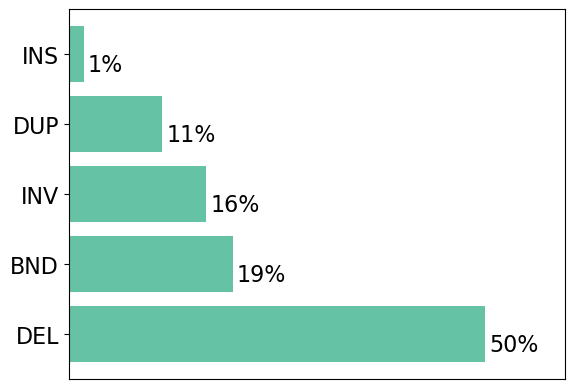

In [14]:
matplotlib.rcParams.update({'font.size': 16})

vartype_c = sv_df.svtype.value_counts()
y = vartype_c/vartype_c.sum()*100

fig, ax = plt.subplots()

ax.barh(vartype_c.index,y,color='#66C2A5')

ax.set_xlim([0,60])

#ax.set_yticks(ax.get_yticks())
#ax.set_yticklabels([str(int(x))+'%' for x in ax.get_yticks()]);

ax.set_xticks([])

for i, v in enumerate(y):
    plt.text(v + 0.5,i - 0.25,  str(int(v))+'%')

In [209]:
#df = merged_df[merged_df.pValue>pValue_thr]
df = merged_df[merged_df.padjust>0.05]

sv_df = df[~df.svtype.isna()].drop_duplicates(['sampleID','geneHGNC'])

N_sv_pairs_neg = len(sv_df)
N_total_pairs_neg = len(df.drop_duplicates(['sampleID','geneHGNC']))
N_nosv_neg = N_total_pairs_neg-N_sv_pairs_neg

print(f'Total sample-gene pairs: {N_total_pairs_neg}\n\
sample-gene pairs overlapping SV: {N_sv_pairs_neg} ({round(N_sv_pairs_neg/N_total_pairs_neg*1000)/10:.1f}%)\n\
sample-gene pairs not overlapping SV: {N_nosv_neg}')

round(sv_df.svtype.value_counts()/len(sv_df)*100)

Total sample-gene pairs: 49698073
sample-gene pairs overlapping SV: 460365 (0.9%)
sample-gene pairs not overlapping SV: 49237708


DEL    44.0
INV    21.0
BND    20.0
DUP     9.0
INS     6.0
Name: svtype, dtype: float64

In [141]:
n1 = N_total_pairs_pos
n2 = N_total_pairs_neg

p1 = N_sv_pairs_pos/N_total_pairs_pos
p2 = N_sv_pairs_neg/N_total_pairs_neg

p = (N_sv_pairs_pos+N_sv_pairs_neg)/(N_total_pairs_pos+N_total_pairs_neg)

(p1-p2)/np.sqrt(p*(1-p)*(1/n1+1/n2))

50.961499231036285

Text(0.5, 0, '')

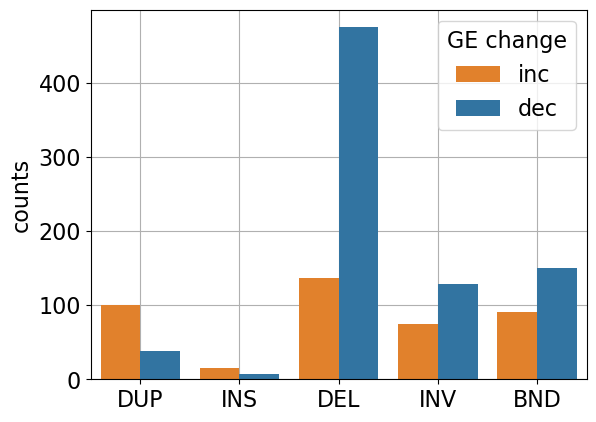

In [242]:
inc_df = sv_df.groupby('svtype').l2fc.agg(lambda x:sum(x>0)).loc[['DUP','INS','DEL','INV','BND']].reset_index()
inc_df['GE change'] = 'inc'
dec_df = sv_df.groupby('svtype').l2fc.agg(lambda x:sum(x<0)).loc[['DUP','INS','DEL','INV','BND']].reset_index()
dec_df['GE change'] = 'dec'
df = pd.concat([inc_df,dec_df])

fig, ax = plt.subplots()

sns.barplot(x='svtype', y='l2fc', hue='GE change', data=df,palette=['tab:orange', 'tab:blue']) 

ax.grid(True)
ax.set_axisbelow(True)
ax.set_ylabel('counts')
ax.set_xlabel('')

In [170]:
from scipy.stats import fisher_exact

In [243]:
df = pd.DataFrame.from_dict(data.apply(lambda x:{'GE inc.':(x>0).sum(),'GE dec.':(x<0).sum()}).to_dict()).T

In [254]:
res = np.ones((5,5))
for svtype1_idx in range(5):
    for svtype2_idx in range(svtype1_idx+1,5):
        table = df.iloc[[svtype1_idx,svtype2_idx],:]
        res[svtype1_idx,svtype2_idx] = fisher_exact(table, alternative='two-sided').pvalue
        res[svtype2_idx,svtype1_idx] = res[svtype1_idx,svtype2_idx]

p_values = pd.DataFrame(res,index=df.index,columns=df.index)

p_values.style.applymap(lambda x: "background: #FAFAD2" if x < 0.05 else "")

,DUP,INS,DEL,INV,BND
DUP,1.000000,0.798772,0.000000,0.000000,0.000000
INS,0.798772,1.000000,0.000010,0.005525,0.006583
DEL,0.000000,0.000010,1.000000,0.000095,0.000010
INV,0.000000,0.005525,0.000095,1.000000,0.843844
BND,0.000000,0.006583,0.000010,0.843844,1.000000


In [255]:
df

,GE inc.,GE dec.
DUP,100,38
INS,15,7
DEL,137,475
INV,74,128
BND,91,150
